In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path

# Set style for better readability
sns.set_theme(style="whitegrid", palette="muted")
plt.rcParams['figure.dpi'] = 100
plt.rcParams['font.size'] = 10
plt.rcParams['axes.labelsize'] = 11
plt.rcParams['axes.titlesize'] = 13


In [2]:
# Load data and define constants
data_path = Path("../responses.csv")
df = pd.read_csv(data_path)

# Define teams of interest
TEAMS = ['Kiwi', 'Coconut', 'Mango', 'Pineapple', 'Other', 'Other Engineer']

# Column names
TEAM_COL = 'Which team are you a part of?'
FREQUENCY_COL = 'How frequently do you currently use AI tools/models in your development process?'

print(f"✓ Loaded {len(df)} survey responses")
print(f"✓ Analyzing {len(TEAMS)} teams: {', '.join(TEAMS)}")


✓ Loaded 47 survey responses
✓ Analyzing 6 teams: Kiwi, Coconut, Mango, Pineapple, Other, Other Engineer


In [3]:
def calculate_adoption_metrics(df, team_name):
    """
    Calculate AI adoption metrics for a specific team.
    
    Returns:
        dict: Contains team name, total members, regular users, daily users, and percentages
    """
    team_df = df[df[TEAM_COL] == team_name].copy()
    
    if len(team_df) == 0:
        return None
    
    total = len(team_df)
    
    # Regular users: Daily or Several times a week
    regular_users = len(team_df[
        team_df[FREQUENCY_COL].isin(['Daily', 'Several times a week'])
    ])
    
    # Daily users
    daily_users = len(team_df[team_df[FREQUENCY_COL] == 'Daily'])
    
    # Calculate percentages
    regular_pct = (regular_users / total) * 100 if total > 0 else 0
    daily_pct = (daily_users / total) * 100 if total > 0 else 0
    
    return {
        'team': team_name,
        'total': total,
        'regular_users': regular_users,
        'daily_users': daily_users,
        'regular_pct': regular_pct,
        'daily_pct': daily_pct
    }


In [4]:
# Calculate adoption metrics for all teams
metrics = []
for team in TEAMS:
    metric = calculate_adoption_metrics(df, team)
    if metric:
        metrics.append(metric)

metrics_df = pd.DataFrame(metrics)

# Sort by regular adoption rate (descending) for better visualization
metrics_df = metrics_df.sort_values('regular_pct', ascending=False)

print("Adoption Metrics Summary:")
print(metrics_df[['team', 'total', 'regular_pct', 'daily_pct']].to_string(index=False))


Adoption Metrics Summary:
          team  total  regular_pct  daily_pct
       Coconut      7   100.000000  71.428571
         Other      5   100.000000  80.000000
          Kiwi      6    83.333333  83.333333
Other Engineer      6    83.333333  83.333333
     Pineapple      5    60.000000  40.000000
         Mango      4    50.000000  25.000000


/var/folders/k7/nk16v26j38j_mcwrggjp5tpc0000gn/T/ipykernel_55773/480027232.py:110: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


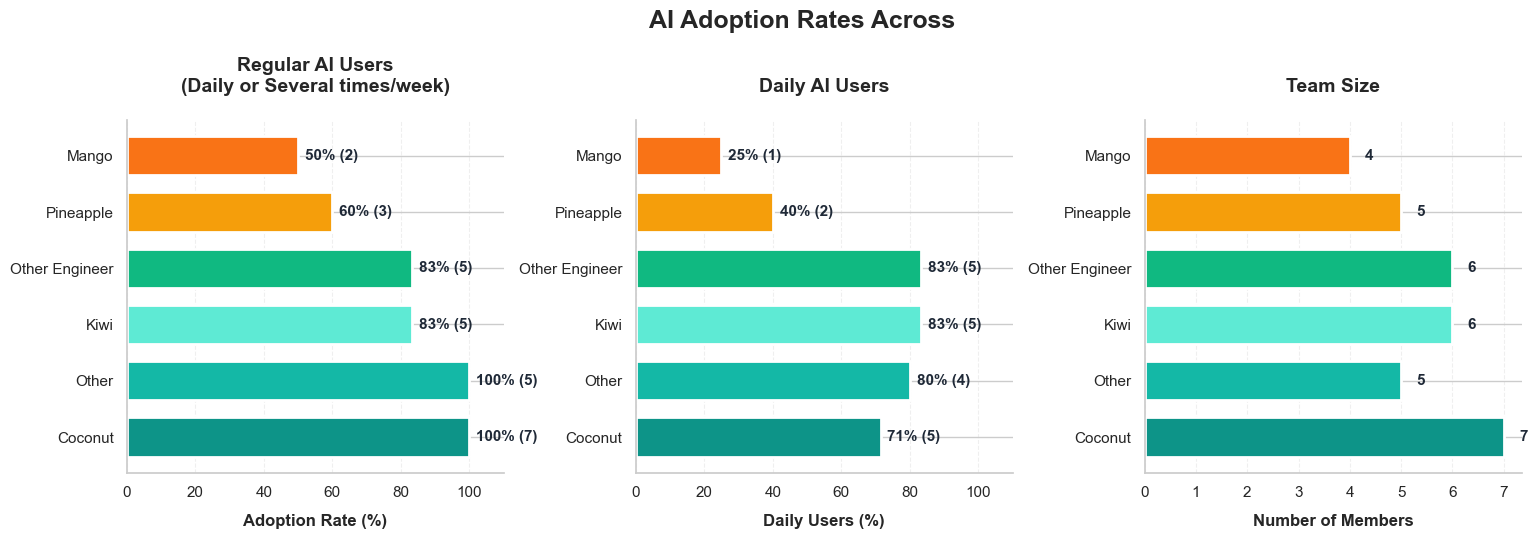

In [5]:
# Create comprehensive adoption rate dashboard
fig = plt.figure(figsize=(18, 11))
gs = fig.add_gridspec(2, 3, hspace=0.4, wspace=0.35)

# Modern color palette - teal/emerald gradient
colors = ['#0D9488', '#14B8A6', '#5EEAD4', '#10B981', '#F59E0B', '#F97316']

# ===== CHART 1: Regular Adoption Rate =====
ax1 = fig.add_subplot(gs[0, 0])

bars1 = ax1.barh(
    metrics_df['team'],
    metrics_df['regular_pct'],
    color=colors[:len(metrics_df)],
    edgecolor='white',
    linewidth=2,
    height=0.7
)

# Add value labels with better positioning
for i, (bar, pct, count) in enumerate(zip(bars1, metrics_df['regular_pct'], metrics_df['regular_users'])):
    ax1.text(
        bar.get_width() + 2,
        bar.get_y() + bar.get_height()/2,
        f'{pct:.0f}% ({int(count)})',
        va='center',
        fontsize=11,
        weight='bold',
        color='#1F2937'
    )

ax1.set_xlabel('Adoption Rate (%)', fontsize=12, weight='bold', labelpad=10)
ax1.set_title('Regular AI Users\n(Daily or Several times/week)', 
              fontsize=14, weight='bold', pad=20)
ax1.set_xlim(0, 110)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.grid(axis='x', alpha=0.3, linestyle='--', linewidth=0.8)
ax1.set_axisbelow(True)

# ===== CHART 2: Daily Users Rate =====
ax2 = fig.add_subplot(gs[0, 1])

bars2 = ax2.barh(
    metrics_df['team'],
    metrics_df['daily_pct'],
    color=colors[:len(metrics_df)],
    edgecolor='white',
    linewidth=2,
    height=0.7
)

for i, (bar, pct, count) in enumerate(zip(bars2, metrics_df['daily_pct'], metrics_df['daily_users'])):
    ax2.text(
        bar.get_width() + 2,
        bar.get_y() + bar.get_height()/2,
        f'{pct:.0f}% ({int(count)})',
        va='center',
        fontsize=11,
        weight='bold',
        color='#1F2937'
    )

ax2.set_xlabel('Daily Users (%)', fontsize=12, weight='bold', labelpad=10)
ax2.set_title('Daily AI Users', fontsize=14, weight='bold', pad=20)
ax2.set_xlim(0, 110)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.grid(axis='x', alpha=0.3, linestyle='--', linewidth=0.8)
ax2.set_axisbelow(True)

# ===== CHART 3: Team Size Comparison =====
ax3 = fig.add_subplot(gs[0, 2])

bars3 = ax3.barh(
    metrics_df['team'],
    metrics_df['total'],
    color=colors[:len(metrics_df)],
    edgecolor='white',
    linewidth=2,
    height=0.7
)

for bar, count in zip(bars3, metrics_df['total']):
    ax3.text(
        bar.get_width() + 0.3,
        bar.get_y() + bar.get_height()/2,
        f'{int(count)}',
        va='center',
        fontsize=11,
        weight='bold',
        color='#1F2937'
    )

ax3.set_xlabel('Number of Members', fontsize=12, weight='bold', labelpad=10)
ax3.set_title('Team Size', fontsize=14, weight='bold', pad=20)
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax3.grid(axis='x', alpha=0.3, linestyle='--', linewidth=0.8)
ax3.set_axisbelow(True)

# Overall title
fig.suptitle(
    'AI Adoption Rates Across',
    fontsize=18,
    weight='bold',
    y=0.98
)

plt.tight_layout()
plt.show()


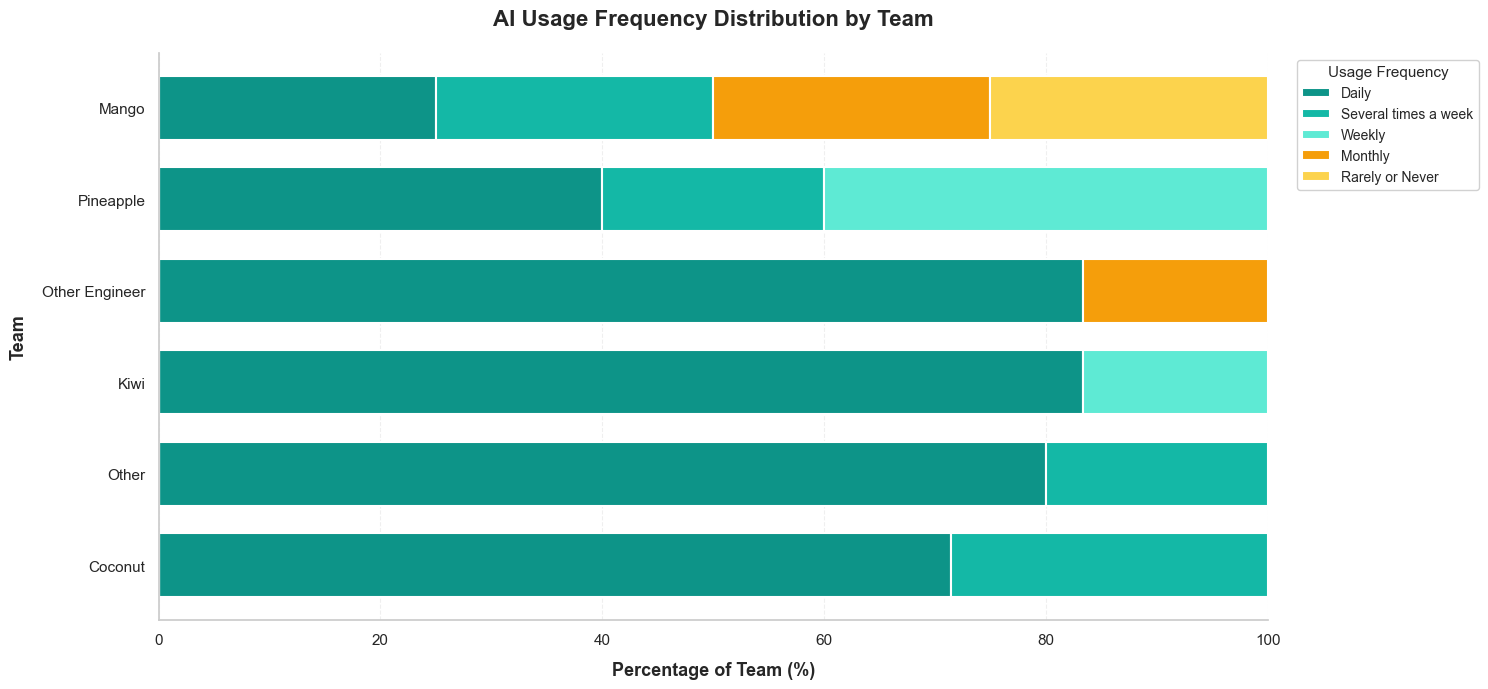

In [6]:
# ===== Frequency Distribution by Team (Stacked Bar Chart) =====
fig, ax = plt.subplots(figsize=(15, 7))

# Prepare data for frequency distribution
frequency_data = []
frequency_order = ['Daily', 'Several times a week', 'Weekly', 'Monthly', 'Rarely or Never']

for team in TEAMS:
    team_df = df[df[TEAM_COL] == team]
    if len(team_df) > 0:
        freq_counts = team_df[FREQUENCY_COL].value_counts().reindex(frequency_order, fill_value=0)
        for freq, count in freq_counts.items():
            if count > 0:  # Only include non-zero values
                frequency_data.append({
                    'Team': team,
                    'Frequency': freq,
                    'Count': count,
                    'Percentage': (count / len(team_df)) * 100
                })

freq_df = pd.DataFrame(frequency_data)

# Create stacked bar chart
freq_pivot = freq_df.pivot(index='Team', columns='Frequency', values='Percentage')
freq_pivot = freq_pivot.reindex(columns=frequency_order, fill_value=0)
freq_pivot = freq_pivot.reindex(metrics_df['team'].values)  # Use same order as metrics

# Color gradient from most frequent (dark) to least frequent (light)
freq_colors = ['#0D9488', '#14B8A6', '#5EEAD4', '#F59E0B', '#FCD34D']

freq_pivot.plot(
    kind='barh',
    stacked=True,
    ax=ax,
    color=freq_colors,
    edgecolor='white',
    linewidth=1.5,
    width=0.7
)

ax.set_xlabel('Percentage of Team (%)', fontsize=13, weight='bold', labelpad=10)
ax.set_ylabel('Team', fontsize=13, weight='bold', labelpad=10)
ax.set_title('AI Usage Frequency Distribution by Team', 
              fontsize=16, weight='bold', pad=20)
ax.set_xlim(0, 100)
ax.legend(
    title='Usage Frequency',
    title_fontsize=11,
    fontsize=10,
    bbox_to_anchor=(1.02, 1),
    loc='upper left',
    framealpha=0.9
)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(axis='x', alpha=0.3, linestyle='--', linewidth=0.8)
ax.set_axisbelow(True)

plt.tight_layout()
plt.show()


In [7]:
# Print formatted summary statistics
print("\n" + "=" * 70)
print("AI ADOPTION RATE SUMMARY".center(70))
print("=" * 70)
print(f"\n{'Team':<20} {'Size':<8} {'Regular Users':<15} {'Daily Users':<12}")
print(f"{'':<20} {'':<8} {'(%)':<15} {'(%)':<12}")
print("-" * 70)

for _, row in metrics_df.iterrows():
    print(f"{row['team']:<20} {int(row['total']):<8} "
          f"{row['regular_pct']:>6.0f}% ({int(row['regular_users']):<2})  "
          f"{row['daily_pct']:>6.0f}% ({int(row['daily_users']):<2})")

print("-" * 70)

# Calculate overall averages
overall_regular = metrics_df['regular_pct'].mean()
overall_daily = metrics_df['daily_pct'].mean()
total_people = metrics_df['total'].sum()
total_regular = metrics_df['regular_users'].sum()
total_daily = metrics_df['daily_users'].sum()

print(f"{'OVERALL AVERAGE':<20} {int(total_people):<8} "
      f"{overall_regular:>6.0f}% ({int(total_regular):<2})  "
      f"{overall_daily:>6.0f}% ({int(total_daily):<2})")
print("=" * 70 + "\n")



                       AI ADOPTION RATE SUMMARY                       

Team                 Size     Regular Users   Daily Users 
                              (%)             (%)         
----------------------------------------------------------------------
Coconut              7           100% (7 )      71% (5 )
Other                5           100% (5 )      80% (4 )
Kiwi                 6            83% (5 )      83% (5 )
Other Engineer       6            83% (5 )      83% (5 )
Pineapple            5            60% (3 )      40% (2 )
Mango                4            50% (2 )      25% (1 )
----------------------------------------------------------------------
OVERALL AVERAGE      33           79% (27)      64% (22)



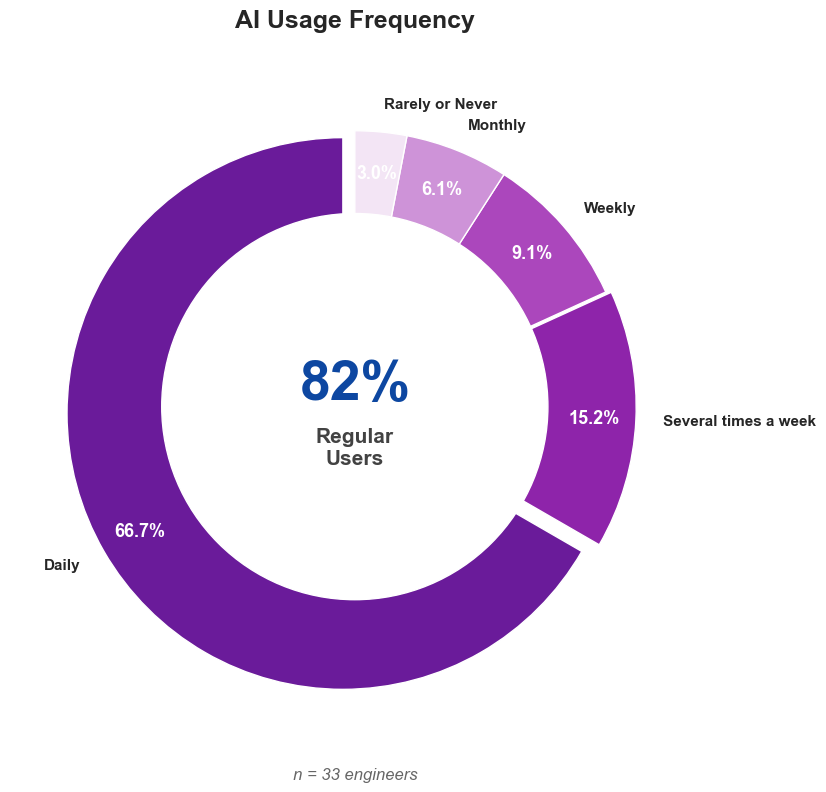


ADOPTION SUMMARY

📊 Sample Size: 33 engineers
   (Excluded: Customer Solutions, Customer Support, Pre-Sales)

🎯 Key Metrics:
   • Regular AI users (Daily + Several times/week): 27 (81.8%)
   • Daily users: 22 (66.7%)

📈 Frequency Breakdown:
   • Daily: 22 engineers (66.7%)
   • Several times a week: 5 engineers (15.2%)
   • Weekly: 3 engineers (9.1%)
   • Monthly: 2 engineers (6.1%)
   • Rarely or Never: 1 engineers (3.0%)




In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the data
df = pd.read_csv('../responses.csv')

# Filter out non-engineering teams
teams_to_exclude = ['Customer Solutions', 'Customer Support', 'Pre-Sales']
df_filtered = df[~df['Which team are you a part of?'].isin(teams_to_exclude)].copy()

# Get column names
frequency_col = 'How frequently do you currently use AI tools/models in your development process?'

# Define frequency order
frequency_order = ['Daily', 'Several times a week', 'Weekly', 'Monthly', 'Rarely or Never']

# Calculate key metrics
total_respondents = len(df_filtered)
frequency_counts = df_filtered[frequency_col].value_counts().reindex(frequency_order, fill_value=0)
daily_users = frequency_counts['Daily']
regular_users = frequency_counts['Daily'] + frequency_counts['Several times a week']
regular_percentage = (regular_users / total_respondents) * 100

# Create figure with smaller size
fig, ax = plt.subplots(figsize=(10, 8))

colors = ['#6A1B9A', '#8E24AA', '#AB47BC', '#CE93D8', '#F3E5F5']  # Purple gradient


# Create pie chart with slight explosion for emphasis
wedges, texts, autotexts = ax.pie(
    frequency_counts.values,
    labels=frequency_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    textprops={'fontsize': 11, 'weight': 'bold'},
    pctdistance=0.85,
    explode=[0.05, 0.02, 0, 0, 0]  # Emphasize daily and several times/week
)

# Make percentage text white for better contrast
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontsize(13)

# Create donut hole
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)

# Add center text with key stat
ax.text(0, 0.08, f'{regular_percentage:.0f}%', 
         ha='center', va='center',
         fontsize=40, weight='bold', color='#0D47A1')
ax.text(0, -0.15, 'Regular\nUsers', 
         ha='center', va='center',
         fontsize=15, weight='bold', color='#424242')

# Add title
plt.title('AI Usage Frequency', 
          fontsize=18, weight='bold', pad=25)

# Add subtitle with sample size
plt.text(0, -1.35, f'n = {total_respondents} engineers', 
         ha='center', fontsize=12, style='italic', color='#666666')

plt.tight_layout()
plt.show()

# Print summary
print("\n" + "="*80)
print("ADOPTION SUMMARY")
print("="*80)

print(f"\n📊 Sample Size: {total_respondents} engineers")
print(f"   (Excluded: Customer Solutions, Customer Support, Pre-Sales)")

print(f"\n🎯 Key Metrics:")
print(f"   • Regular AI users (Daily + Several times/week): {int(regular_users)} ({regular_percentage:.1f}%)")
print(f"   • Daily users: {int(daily_users)} ({daily_users/total_respondents*100:.1f}%)")

print(f"\n📈 Frequency Breakdown:")
for freq, count in frequency_counts.items():
    pct = count / total_respondents * 100
    print(f"   • {freq}: {int(count)} engineers ({pct:.1f}%)")

print("\n" + "="*80 + "\n")